In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
#import pylab as pl
from bubbly.bubbly import bubbleplot 
from plotly.graph_objs import Scatter, Figure, Layout

 #importing dataset


In [2]:
dataset3=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False,low_memory=False)


b'Skipping line 1149094: expected 23 fields, saw 41\n'


# Data Preprocessing


# count number of nans 

In [3]:
print(dataset3.isnull().sum())

Unnamed: 0                  0
ID                          0
Case Number                 6
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      291
Arrest                      0
Domestic                    0
Beat                        0
District                   83
Ward                       63
Community Area           1455
FBI Code                    0
X Coordinate            28645
Y Coordinate            28645
Year                        0
Updated On                  0
Latitude                28645
Longitude               28645
Location                28645
dtype: int64


# Droping Null Values


In [4]:
dataset3=dataset3.dropna(how='any',axis=0)


# Formatting data

In [5]:
dataset3.Date=pd.to_datetime(dataset3.Date,format='%m/%d/%Y %I:%M:%S %p')

# Setting Index To Date


In [6]:
dataset3.index=pd.DatetimeIndex(dataset3.Date)

# Adding Time Hour Grouping  

In [7]:
dataset3['time_hour']=dataset3['Date'].apply(lambda x: x.hour)
dataset3['month']=dataset3['Date'].apply(lambda x: x.month)
dataset3['year']=dataset3['Date'].apply(lambda x: x.year)
dataset3.drop(['Unnamed: 0','Year'],inplace=True,axis=1)


# Analysis of Each Dataset By creating a Word Cloud

# 1.On The Basis on Total Number Of Crimes Made 

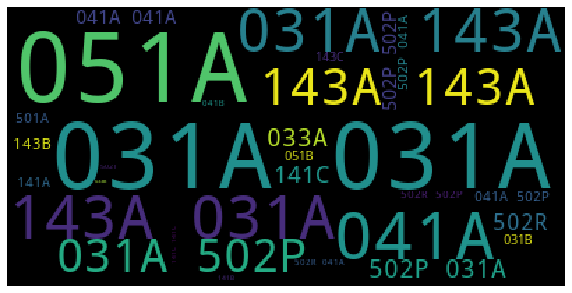

In [8]:
crime_code=" ".join(crime for crime in dataset3['IUCR'])
crime_code_wc=WordCloud().generate(crime_code)
plt.figure(figsize=[10,10])
plt.imshow(crime_code_wc)
plt.axis("off")
plt.show()

# 2. On The Basis on Total Number Of Location of Crimes 

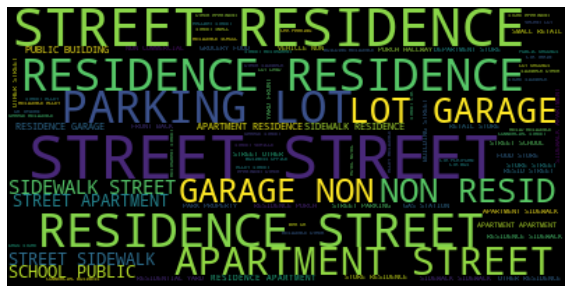

In [9]:
location_des=" ".join(i for i in dataset3['Location Description'])
location_des_wc=WordCloud().generate(location_des)
plt.figure(figsize=[10,10])
plt.imshow(location_des_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# 3. On The Basis of Total number of Arrest Made 

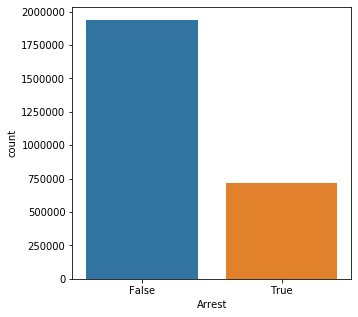

In [10]:
pd.value_counts(dataset3['Arrest'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='Arrest',data=dataset3,order=dataset3['Arrest'].value_counts().index)

#  4. crime rate over years

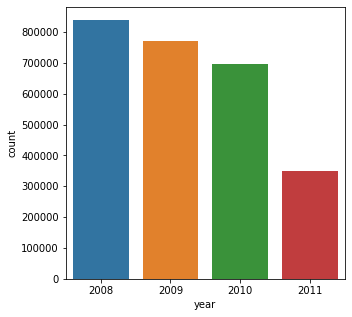

In [11]:
pd.value_counts(dataset3['year'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=dataset3,order=dataset3['year'].value_counts().index)

#  5. Arrest over period

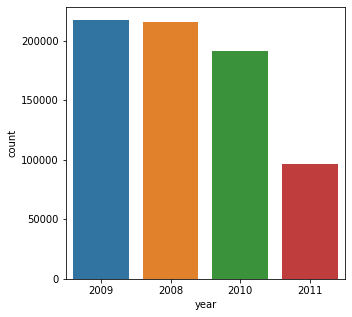

In [12]:
d3=dataset3[dataset3['Arrest']==True]
pd.value_counts(d3['Arrest'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=d3,order=d3['year'].value_counts().index)

# 6. Monthly Analysis

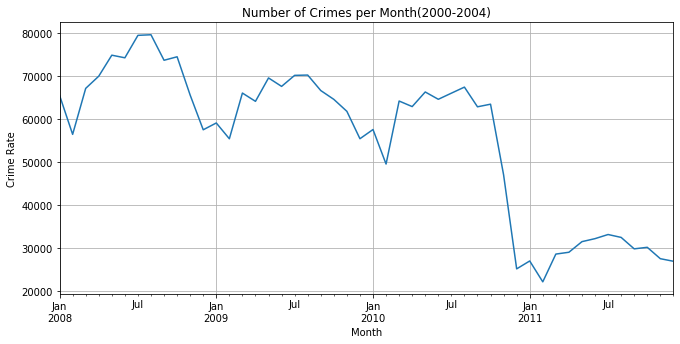

In [13]:
plt.figure(figsize=(11,5))
dataset3.resample('M').size().plot(legend=False,grid=True)
plt.title('Number of Crimes per Month(2000-2004)')
plt.xlabel('Month')
plt.ylabel('Crime Rate')
plt.show()

# 7. Individual Crime type Trend 

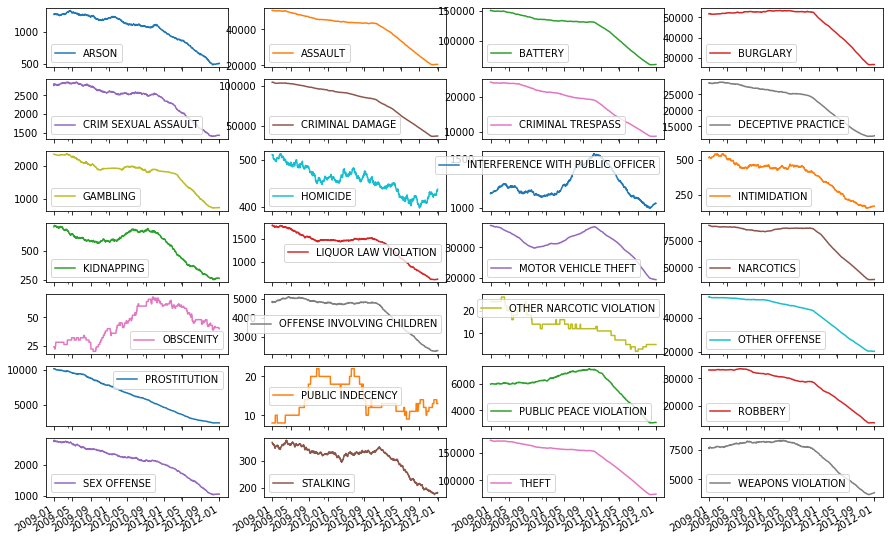

In [14]:
crime_p=dataset3.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=dataset3.index.date,fill_value=0)
plot=crime_p.rolling(365).sum().plot(figsize=(15,10),subplots=True,layout=(-1,4))

# 8. Individual Crime type-theft over time period 

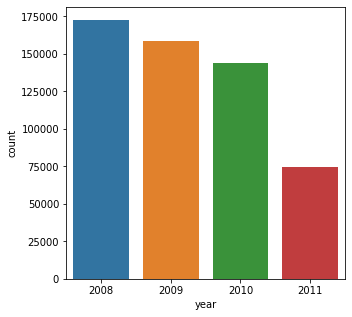

In [15]:
d3=dataset3[dataset3['Primary Type']=='THEFT']
pd.value_counts(d3['Primary Type'])[:]
plt.figure(figsize=(5,5))
sns.countplot(x='year',data=d3,order=d3['year'].value_counts().index)

#  Applying K means to find trends

In [16]:
chicago_df=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False,low_memory=False)
chicago_df.drop(['Unnamed: 0','X Coordinate', 'Y Coordinate','Updated On','Beat','Location'], inplace=True, axis=1)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [17]:
print(chicago_df.isnull().sum())

ID                          0
Case Number                 6
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      291
Arrest                      0
Domestic                    0
District                   83
Ward                       63
Community Area           1455
FBI Code                    0
Year                        0
Latitude                28645
Longitude               28645
dtype: int64


In [18]:
chicago_df=chicago_df.dropna()

In [19]:
print(chicago_df.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
dtype: int64


In [20]:
 #Assembling a datetime by rearranging the dataframe column "Date". 
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')
chicago_df['date']=[d.date() for d in chicago_df['Date']]
chicago_df['time']=[d.time() for d in chicago_df['Date']]
chicago_df['time'] = chicago_df['time'].astype(str)
empty_list = []
for timestr in chicago_df['time'].tolist():
    ftr = [3600,60,1]
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])
    empty_list.append(var)
    
chicago_df['seconds'] = empty_list

chicago_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,date,time,seconds
0,4785,HP610824,2008-10-07 12:39:00,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,3.0,6.0,69.0,01A,2008,41.758276,-87.622451,2008-10-07,12:39:00,45540
1,4786,HP616595,2008-10-09 03:30:00,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,15.0,24.0,25.0,01A,2008,41.870252,-87.746069,2008-10-09,03:30:00,12600
2,4787,HP616904,2008-10-09 08:35:00,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,8.0,18.0,66.0,01A,2008,41.770990,-87.698901,2008-10-09,08:35:00,30900
3,4788,HP618616,2008-10-10 02:33:00,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,15.0,37.0,25.0,01A,2008,41.894917,-87.757358,2008-10-10,02:33:00,9180
4,4789,HP619020,2008-10-10 12:50:00,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,10.0,22.0,30.0,01A,2008,41.843826,-87.709893,2008-10-10,12:50:00,46200


In [21]:
#Firstly we will cluster our District, Ward and Primary Type(IUCR code) so that we can identify which portions of the city experience criminal attacks of which type.

In [22]:
sub_data = chicago_df[['Ward', 'IUCR', 'District']]
sub_data = sub_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data['IUCR'] = sub_data.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data.head()

,Ward,IUCR,District
0,6.0,110,3.0
1,24.0,110,15.0
2,18.0,110,8.0
3,37.0,110,15.0
4,22.0,110,10.0


In [23]:
#normalizing the data
sub_data['IUCR'] = (sub_data['IUCR'] - sub_data['IUCR'].min())/(sub_data['IUCR'].max()-sub_data['IUCR'].min())
sub_data['Ward'] = (sub_data['Ward'] - sub_data['Ward'].min())/(sub_data['Ward'].max()-sub_data['Ward'].min())
sub_data['District'] = (sub_data['District'] - sub_data['District'].min())/(sub_data['District'].max()-sub_data['District'].min())

In [24]:
#checking the optimum number of clusters using elbow method
N = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(sub_data).score(sub_data) for i in range(len(kmeans))]
score
plt.plot(N,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

KeyboardInterrupt: 

In [31]:
km = KMeans(n_clusters=3)
km.fit(sub_data)
y = km.predict(sub_data)
labels = km.labels_
sub_data['Cluster'] = y

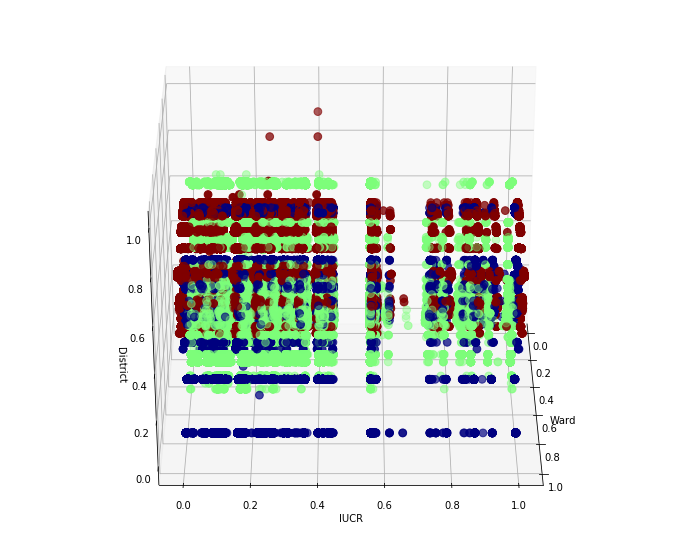

In [32]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data['Ward'])
y = np.array(sub_data['IUCR'])
z = np.array(sub_data['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

In [ ]:
#now clustering based on Time, District and Primary Type(as per IUCR codes). We have to normalize time in seconds to be between 1 and 0, with 0.5 representing the time 12:00 noon (else clusters will only be based on time segments due to large value of time in seconds), that way the clusters will be divided into sections of morning, afternoon and night.
#lower values would indicate midnight to early morning
#medium values would indicate the afternoon sessions
#high values would indicate evening and night time


In [34]:
chicago_df['Normalized_time'] = (chicago_df['seconds'] - chicago_df['seconds'].min())/(chicago_df['seconds'].max()-chicago_df['seconds'].min())

In [36]:
sub_data1 = chicago_df[['IUCR', 'Normalized_time', 'District']]
sub_data1['IUCR'] = sub_data1.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data1['IUCR'] = (sub_data1['IUCR'] - sub_data1['IUCR'].min())/(sub_data1['IUCR'].max()-sub_data1['IUCR'].min())
sub_data1['District'] = (sub_data1['District'] - sub_data1['District'].min())/(sub_data1['District'].max()-sub_data1['District'].min())
sub_data1.head()

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,IUCR,Normalized_time,District
1,0.561044,0.000000,0.266667
4,0.162651,0.041667,0.700000
6,0.047189,0.458339,0.133333
7,0.999197,0.000000,0.700000
9,0.162450,0.000000,0.333333


In [37]:
#using elbow method to find optimal number of clusters in kmeans
N = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
score
pl.plot(N,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

KeyboardInterrupt: 

In [38]:
km = KMeans(n_clusters=4)
km.fit(sub_data1)
y = km.predict(sub_data1)
labels = km.labels_
sub_data1['Clusters'] = y
sub_data1.head()

C:\Users\AditiGupta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IUCR,Normalized_time,District,Clusters
1,0.561044,0.000000,0.266667,0
4,0.162651,0.041667,0.700000,0
6,0.047189,0.458339,0.133333,1
7,0.999197,0.000000,0.700000,0
9,0.162450,0.000000,0.333333,0


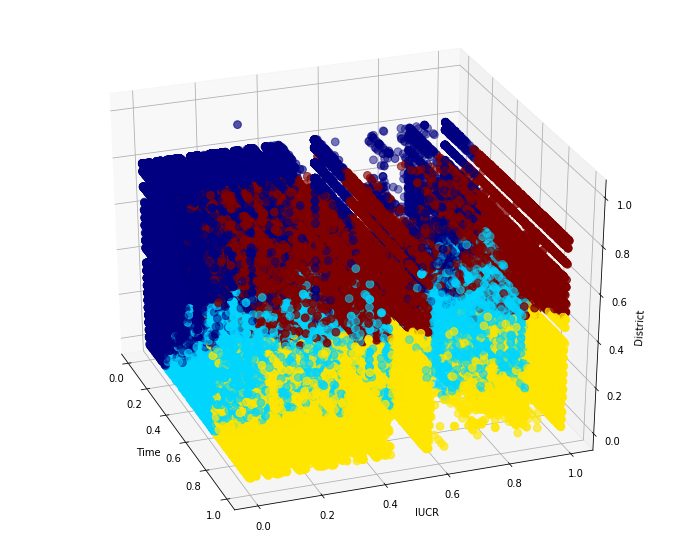

In [39]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data1['Normalized_time'])
y = np.array(sub_data1['IUCR'])
z = np.array(sub_data1['District'])

ax.set_xlabel('Time')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="jet")
ax.view_init(azim=-20)
#print(ax.azim)
plt.show()